In [1]:
import time
import itertools
import time, os, fnmatch, shutil
import pickle
import re
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
import matplotlib

#matplotlib.rcParams.update({'font.size': 22})

%matplotlib inline

from __future__ import print_function, division
import requests

In [2]:
folder = '/Users/torrie/Documents/Metis_Project_3_(McNulty)/'
pkl_filename_master = folder + 'All_data_final_with_ins_2.pkl'
with open(pkl_filename_master, 'rb') as picklefile: 
    df_model_data = pickle.load(picklefile)

In [3]:
df_model_data.columns

Index([u'Average_Covered_Charges', u'Average_Medicare_Payments',
       u'Average_Total_Payments', u'DRG_Definition',
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',
       u'Provider_ID', u'Provider_Name', u'Provider_State',
       u'Provider_Street_Address',
       ...
       u'Uninsured: MOE', u'Uninsured: %', u'Uninsured: %MOE',
       u'Insured: Number', u'Insured: MOE', u'Insured: %', u'Insured: %MOE',
       u'county_only', u'State_abbrev', u'State_full'],
      dtype='object', length=145)

In [4]:
df_Model_1 = df_model_data.copy()

In [5]:
Column_list = [u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Covered_Charges_median_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Covered_Charges_median_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
              u'log_Average_Covered_Charges_median_3_bins',\
              u'Average_Covered_Charges_median_3_bins']


for column in Column_list:
    df_Model_1[column] = pd.to_numeric(df_Model_1[column])
    df_Model_1[column] = df_Model_1[column].astype(float)
    

In [6]:
#df_Model_1 = df_Model_1.drop(['Patient_payment','Patient_Payments_Stdev','Patient_Payments_Avg','Medicare_Payments_Std','Medicare_Payments_Avg','Total_Payments_Stdev','Total_Payments_Avg','Covered_Charges_Stdev','Covered_Charges_Avg','Provider_Name','Average_Covered_Charges','Provider_Street_Address','Provider_City','Hospital_Referral_Region_Description','Total_Discharges','Average_Total_Payments','Meets_criteria_for_meaningful_use_of_EHRs','Readmission_national_comparison','Patient_experience_national_comparison','Average_Medicare_Payments','Hospital_Name', 'County_Name'],1)

df_Model_1 = df_Model_1.drop([u'Average_Covered_Charges', u'Average_Medicare_Payments',\
       u'Average_Total_Payments', \
       u'Hospital_Referral_Region_(HRR)_Description', u'Provider_City',\
       u'Provider_ID', u'Provider_Name',\
       u'Provider_Street_Address',u'Total_Discharges',\
       u'Hospital_Name',u'Patient_payment',\
       u'log_Average_Covered_Charges', u'log_Average_Medicare_Payments',\
       u'log_Average_Total_Payments', u'log_Patient_payment',\
       u'Average_Covered_Charges_mean', u'Average_Covered_Charges_median',\
       u'Average_Covered_Charges_std', u'Average_Medicare_Payments_mean',\
       u'Average_Medicare_Payments_median', u'Average_Medicare_Payments_std',\
       u'Average_Total_Payments_mean', u'Average_Total_Payments_median',\
       u'Average_Total_Payments_std', u'Patient_payment_mean',\
       u'Patient_payment_median', u'Patient_payment_std',\
       u'log_Average_Covered_Charges_mean',\
       u'log_Average_Covered_Charges_median',\
       u'log_Average_Covered_Charges_std',\
       u'log_Average_Medicare_Payments_mean',\
       u'log_Average_Medicare_Payments_median',\
       u'log_Average_Medicare_Payments_std',\
       u'log_Average_Total_Payments_mean',\
       u'log_Average_Total_Payments_median', u'log_Average_Total_Payments_std',\
       u'log_Patient_payment_mean', u'log_Patient_payment_median',\
       u'log_Patient_payment_std', u'Average_Covered_Charges_ST_mean',\
       u'Average_Covered_Charges_ST_median', u'Average_Covered_Charges_ST_std',\
       u'Average_Medicare_Payments_ST_mean',\
       u'Average_Medicare_Payments_ST_median',\
       u'Average_Medicare_Payments_ST_std', u'Average_Total_Payments_ST_mean',\
       u'Average_Total_Payments_ST_median', u'Average_Total_Payments_ST_std',\
       u'Patient_payment_ST_mean', u'Patient_payment_ST_median',\
       u'Patient_payment_ST_std', u'log_Average_Covered_Charges_ST_mean',\
       u'log_Average_Covered_Charges_ST_median',\
       u'log_Average_Covered_Charges_ST_std',\
       u'log_Average_Medicare_Payments_ST_mean',\
       u'log_Average_Medicare_Payments_ST_median',\
       u'log_Average_Medicare_Payments_ST_std',\
       u'log_Average_Total_Payments_ST_mean',\
       u'log_Average_Total_Payments_ST_median',\
       u'log_Average_Total_Payments_ST_std', u'log_Patient_payment_ST_mean',\
       u'log_Patient_payment_ST_median', u'log_Patient_payment_ST_std',\
       u'Average_Covered_Charges_mean_3_bins',\
       u'Average_Covered_Charges_mean_ST_3_bins',\
       u'Average_Medicare_Payments_mean_3_bins',\
       u'Average_Medicare_Payments_mean_ST_3_bins',\
       u'Average_Medicare_Payments_median_3_bins',\
       u'Average_Medicare_Payments_median_ST_3_bins',\
       u'Average_Total_Payments_mean_3_bins',\
       u'Average_Total_Payments_mean_ST_3_bins',\
       u'Average_Total_Payments_median_3_bins',\
       u'Average_Total_Payments_median_ST_3_bins',\
       u'Patient_payment_mean_3_bins', u'Patient_payment_mean_ST_3_bins',\
       u'Patient_payment_median_3_bins', u'Patient_payment_median_ST_3_bins',\
       u'log_Average_Covered_Charges_mean_3_bins',\
       u'log_Average_Covered_Charges_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_mean_3_bins',\
       u'log_Average_Medicare_Payments_mean_ST_3_bins',\
       u'log_Average_Medicare_Payments_median_3_bins',\
       u'log_Average_Medicare_Payments_median_ST_3_bins',\
       u'log_Average_Total_Payments_mean_3_bins',\
       u'log_Average_Total_Payments_mean_ST_3_bins',\
       u'log_Average_Total_Payments_median_3_bins',\
       u'log_Average_Total_Payments_median_ST_3_bins',\
       u'log_Patient_payment_mean_3_bins',\
       u'log_Patient_payment_mean_ST_3_bins',\
       u'log_Patient_payment_median_3_bins',\
       u'log_Patient_payment_median_ST_3_bins',\
       u'Average_Covered_Charges_median_3_bins',\
       u'log_Average_Covered_Charges_median_3_bins',\
       u'Provider_State', u'Provider_Zip_Code',\
        u'State_spelled', u'County_State',\
        u'County', u'State',u'Percent_female',\
        u'Percent_some_other_race',u'Mean_income_zip',\
                             u'County_Name'],1)
 


In [7]:
df_model_data.Average_Covered_Charges_median_ST_3_bins.value_counts()


0    92192
1    80469
2    65890
Name: Average_Covered_Charges_median_ST_3_bins, dtype: int64

In [8]:
df_Model_1.columns

Index([u'DRG_Definition', u'Service_type', u'Hospital_Type',
       u'Hospital_Ownership', u'Emergency_Services',
       u'Average_Covered_Charges_median_ST_3_bins',
       u'log_Average_Covered_Charges_median_ST_3_bins',
       u'DRG_Definition_count', u'Median_Age', u'Percent_over_65',
       u'Percent_Native_American', u'Percent_asian',
       u'Percent Black or African American', u'Percent_hispanic_or_latino',
       u'Percent_Male', u'Percent_Occupied_Housing_Units', u'Percent_white',
       u'Rental_vacancy_rate', u'Homeowner_vacancy_rate',
       u'Average_family_size', u'Median_income_zip', u'Zip_population',
       u'Age Category', u'Income Category', u'Race Category', u'Sex Category',
       u'Year', u'ID', u'Name', u'Demographic Group: Number',
       u'Demographic Group: MOE', u'Uninsured: Number', u'Uninsured: MOE',
       u'Uninsured: %', u'Uninsured: %MOE', u'Insured: Number',
       u'Insured: MOE', u'Insured: %', u'Insured: %MOE', u'county_only',
       u'State_abbrev'

First model will be without ratings d/t data loss of specific hospital types if we leave them in 

In [9]:
df_Model_1a = df_Model_1[df_Model_1.Service_type == '0']

In [10]:
df_Model_1a[[u'Service_type', u'Hospital_Type',\
       u'Hospital_Ownership', u'Emergency_Services',\
       u'Average_Covered_Charges_median_ST_3_bins']].apply(pd.Series.value_counts)
 

,Service_type,Hospital_Type,Hospital_Ownership,Emergency_Services,Average_Covered_Charges_median_ST_3_bins
False,NaN,NaN,NaN,2782.0,76042.0
True,NaN,NaN,NaN,198548.0,71212.0
2.0,NaN,NaN,NaN,NaN,55402.0
0,202656.0,NaN,NaN,NaN,NaN
Acute Care Hospitals,NaN,201330.0,NaN,NaN,NaN
Government - Federal,NaN,NaN,444.0,NaN,NaN
Government - Hospital District or Authority,NaN,NaN,13844.0,NaN,NaN
Government - Local,NaN,NaN,6730.0,NaN,NaN
Government - State,NaN,NaN,4430.0,NaN,NaN
Physician,NaN,NaN,578.0,NaN,NaN


In [11]:
df_Model_1a['Hospital_Ownership'] = df_Model_1a['Hospital_Ownership'].replace('Tribal','zTribal')


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
df_Model_1a.dtypes

DRG_Definition                                   object
Service_type                                     object
Hospital_Type                                    object
Hospital_Ownership                               object
Emergency_Services                               object
Average_Covered_Charges_median_ST_3_bins        float64
log_Average_Covered_Charges_median_ST_3_bins    float64
DRG_Definition_count                              int64
Median_Age                                      float64
Percent_over_65                                 float64
Percent_Native_American                         float64
Percent_asian                                   float64
Percent Black or African American               float64
Percent_hispanic_or_latino                      float64
Percent_Male                                    float64
Percent_Occupied_Housing_Units                  float64
Percent_white                                   float64
Rental_vacancy_rate                             

In [13]:
df_Model_1a['Average_Covered_Charges_median_ST_3_bins'].groupby(df_Model_1a['Hospital_Ownership']).mean()

Hospital_Ownership
Government - Federal                           0.385135
Government - Hospital District or Authority    0.623447
Government - Local                             0.624517
Government - State                             0.983296
Physician                                      0.754325
Proprietary                                    1.296747
Voluntary non-profit - Church                  0.919145
Voluntary non-profit - Other                   0.825989
Voluntary non-profit - Private                 0.842140
zTribal                                        0.000000
Name: Average_Covered_Charges_median_ST_3_bins, dtype: float64

In [14]:
df_Model_1a = df_Model_1a.drop(['Service_type',u'Hospital_Type',\
       u'Age Category', u'Income Category', u'Race Category', u'Sex Category',\
       u'Year', u'ID', u'Name', u'Demographic Group: Number',\
       u'Demographic Group: MOE',u'county_only', u'State_abbrev', u'Emergency_Services',\
        u'Percent_over_65',u'Rental_vacancy_rate', u'Uninsured: Number', \
        u'Uninsured: MOE',u'Uninsured: %MOE', u'Insured: Number', \
        u'Insured: MOE', u'Insured: %', u'Insured: %MOE',u'Homeowner_vacancy_rate'],1)


In [15]:
pd.isnull(df_Model_1a).sum()

DRG_Definition                                      0
Hospital_Ownership                               1326
Average_Covered_Charges_median_ST_3_bins            0
log_Average_Covered_Charges_median_ST_3_bins        0
DRG_Definition_count                                0
Median_Age                                      14163
Percent_Native_American                         14163
Percent_asian                                   14163
Percent Black or African American               14163
Percent_hispanic_or_latino                      14163
Percent_Male                                    14163
Percent_Occupied_Housing_Units                  14163
Percent_white                                   14163
Average_family_size                             14163
Median_income_zip                               17807
Zip_population                                  17807
Uninsured: %                                    14848
State_full                                      14848
dtype: int64

In [16]:
df_Model_1a.shape

(202656, 18)

In [17]:
df_Model_1a = df_Model_1a.dropna()

In [18]:
df_Model_1a.shape

(170538, 18)

In [19]:
# df_Model_1a_check = df_Model_1a.drop([u'log_Average_Covered_Charges_median_3_bins',\
#        u'DRG_Definition_count', u'Percent_Native_American',\
#        u'Percent_asian', u'Percent Black or African American',\
#        u'Percent_hispanic_or_latino',u'Zip_population', u'State_full'],1)


# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set(context="paper", font="monospace")

# # Load the datset of correlations between cortical brain networks
# df = df_Model_1a_check
# corrmat = df.corr()

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(12, 9))

# # Draw the heatmap using seaborn
# sns.heatmap(corrmat, vmax=.8, square=True)

# f.tight_layout()

In [20]:
# df_Model_1a_plot = df_Model_1a.sample(frac=0.25)


In [21]:
# df_Model_1a_plot = df_Model_1a_plot.drop([
#        u'DRG_Definition_count', u'Percent_Native_American',\
#        u'Percent_asian', u'Percent Black or African American',\
#        u'Zip_population', u'State_full', u'Hospital_Ownership',\
#        u'Average_Covered_Charges_median_ST_3_bins'],1)


In [22]:
# df_Model_1a_plot.columns

In [23]:
#sns.pairplot(df_Model_1a_plot, kind="reg");

Prepare train/test set for checking classification algorithms with cross validation:

In [24]:
df_Model_1a.Average_Covered_Charges_median_ST_3_bins.value_counts()

0.0    64203
1.0    59097
2.0    47238
Name: Average_Covered_Charges_median_ST_3_bins, dtype: int64

In [25]:
df_Model_1a = df_Model_1a[df_Model_1a.DRG_Definition_count >= 1500]

In [26]:
X = df_Model_1a.drop([u'Average_Covered_Charges_median_ST_3_bins', \
       u'log_Average_Covered_Charges_median_ST_3_bins', u'DRG_Definition_count',u'Percent_Native_American',\
       u'Percent_asian', u'Percent Black or African American',\
       u'Percent_hispanic_or_latino',u'Zip_population',u'Average_family_size',u'Percent_white'],1)

In [27]:
df_Model_1a.Average_Covered_Charges_median_ST_3_bins.value_counts()

0.0    31022
1.0    25768
2.0    22189
Name: Average_Covered_Charges_median_ST_3_bins, dtype: int64

In [28]:
#y = df_Model_1a[u'Average_Covered_Charges_median_3_bins']

y = df_Model_1a[u'Average_Covered_Charges_median_ST_3_bins']

In [29]:
X_fewer_var = X     #.drop([u'Percent_Occupied_Housing_Units_y',u'Average_family_size',u'Percent_over_65'],1)

In [30]:
X_fewer_var.shape

(78979, 8)

In [31]:
X_fewer_var.columns

Index([u'DRG_Definition', u'Hospital_Ownership', u'Median_Age',
       u'Percent_Male', u'Percent_Occupied_Housing_Units',
       u'Median_income_zip', u'Uninsured: %', u'State_full'],
      dtype='object')

In [32]:
X_fewer_var_names = X_fewer_var.rename(columns={'DRG_Definition': 'Diagnosis', 'Hospital_Ownership': 'Hospital Ownership',\
                                                'Median_Age':'Median Age','Percent_Male':'Percent Male',\
                                               'Percent_Occupied_Housing_Units':'Percent Occupied Housing Units','Median_income_zip':'Median Income',\
                                               'Zip_population':'Population'})




In [33]:
y.value_counts()

0.0    31022
1.0    25768
2.0    22189
Name: Average_Covered_Charges_median_ST_3_bins, dtype: int64

In [36]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_coded = X_fewer_var_names.apply(preprocessing.LabelEncoder().fit_transform)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_coded, y, test_size=0.3)

Import the necessary tools:

In [38]:
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import RandomizedSearchCV


## KNN:

In [39]:
param_grid = {'n_neighbors': range(1, 100),
              'weights': ['uniform', 'distance']}

rand = RandomizedSearchCV(KNeighborsClassifier(), 
                          param_grid, 
                          cv=4, 
                          scoring='accuracy',
                          n_iter=50)

rand = rand.fit(X_train, y_train)

Look at the results from the cross validation:

In [40]:
cv_results = pd.DataFrame.from_dict(rand.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.118945,0.489865,0.723741,0.994013,30,distance,"{u'n_neighbors': 30, u'weights': u'distance'}",8,0.720828,0.994163,0.725293,0.994308,0.724819,0.993826,0.724023,0.993754,0.021873,0.053469,0.001742,0.000230
1,0.114586,0.126153,0.704802,0.994013,3,distance,"{u'n_neighbors': 3, u'weights': u'distance'}",25,0.705636,0.994163,0.706917,0.994308,0.702533,0.993826,0.704124,0.993754,0.006679,0.019256,0.001641,0.000230
2,0.114565,0.254722,0.723958,0.768533,11,uniform,"{u'n_neighbors': 11, u'weights': u'uniform'}",4,0.722636,0.768704,0.724714,0.768734,0.725181,0.769131,0.723300,0.767563,0.018749,0.068878,0.001031,0.000585
3,0.118552,1.043243,0.543493,0.557957,97,uniform,"{u'n_neighbors': 97, u'weights': u'uniform'}",49,0.548361,0.558246,0.539358,0.559197,0.544790,0.557241,0.541462,0.557145,0.015246,0.086381,0.003414,0.000836
4,0.105219,0.420878,0.682644,0.710705,27,uniform,"{u'n_neighbors': 27, u'weights': u'uniform'}",29,0.682269,0.710795,0.678339,0.709211,0.686469,0.712505,0.683502,0.710310,0.004472,0.019713,0.002917,0.001187


In [41]:
print(rand.best_estimator_, rand.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance') 0.725621778059


In [42]:
print(accuracy_score(y_test, rand.best_estimator_.predict(X_test)))

0.733983286908


In [43]:
y_true = y_test
y_pred = rand.best_estimator_.predict(X_test)

Confusion matrix, without normalization
[[7339 1642  219]
 [1651 4866 1242]
 [ 192 1357 5186]]
Precision Matrix
[[ 0.8   0.18  0.02]
 [ 0.21  0.62  0.16]
 [ 0.03  0.2   0.78]]


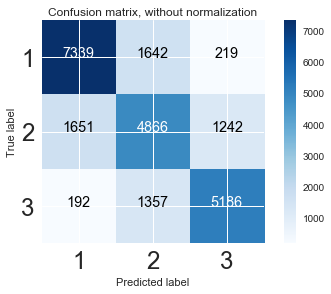

In [44]:
from sklearn.metrics import confusion_matrix
class_names = [1,2,3]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 24)
    plt.yticks(tick_marks, classes,fontsize = 24)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 size = 'x-large',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    precision = np.empty([cm.shape[0], cm.shape[1]])
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        precision[i,j] = cnf_matrix[i,j]/cm[:,i].sum()
    print("Precision Matrix")
    print(precision)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

In [45]:
# def Precision_Matrix(cnf_matrix):
#     precision = np.empty([cnf_matrix.shape[0], cnf_matrix.shape[1]])
#     for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
#         precision[i,j] = cnf_matrix[i,j]/cnf_matrix[:,i].sum()
#     return precision           

In [46]:
#Precision_Matrix(cnf_matrix)

## Random Forest:

In [47]:
# #from sklearn import svm, datasets
# #uses a 3-fold CV by default if you do not define otherwise
# from sklearn.model_selection import GridSearchCV

# #parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# #svr = svm.SVC()
# #clf = GridSearchCV(svr, parameters)

# clf = RandomForestClassifier()

# param_grid = {"max_depth": [3, None],
#               "max_features": [3,5,10,13,16],
#               "min_samples_split": [5,10,15],
#               "min_samples_leaf": [5,10,15],
#               "bootstrap": [True],
#               "criterion": ["gini"]}

# grid_search = GridSearchCV(clf, param_grid=param_grid)
# #start = time()
# grid_search.fit(X_coded, y)

# report(grid_search.cv_results_)

# # clf.fit()
# # ...                             
# # GridSearchCV(cv=None, error_score=...,
# #        estimator=SVC(C=1.0, cache_size=..., class_weight=..., coef0=...,
# #                      decision_function_shape=None, degree=..., gamma=...,
# #                      kernel='rbf', max_iter=-1, probability=False,
# #                      random_state=None, shrinking=True, tol=...,
# #                      verbose=False),
# #        fit_params={}, iid=..., n_jobs=1,
# #        param_grid=..., pre_dispatch=..., refit=..., return_train_score=...,
# #        scoring=..., verbose=...)
# # sorted(clf.cv_results_.keys())
# # ...                             
# # ['mean_fit_time', 'mean_score_time', 'mean_test_score',...
# #  'mean_train_score', 'param_C', 'param_kernel', 'params',...
# #  'rank_test_score', 'split0_test_score',...
# #  'split0_train_score', 'split1_test_score', 'split1_train_score',...
# #  'split2_test_score', 'split2_train_score',...
# #  'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'...]

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# specify parameters and distributions to sample from
param_dist = {"max_depth": [10,5,3,None],
              "max_features": sp_randint(1,3,5),
              "min_samples_split": sp_randint(2,50),
              "min_samples_leaf": sp_randint(2,50),
              "bootstrap": [True, False],
              "criterion": ["gini","entropy"]}

# run randomized search
n_iter_search = 60
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)


random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=60, n_jobs=1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x135743390>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x135743310>, 'criterion': ['gini', 'entropy'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x135c14e10>, 'max_depth': [10, 5, 3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, s

In [49]:
print(random_search.best_estimator_,random_search.best_score_, random_search.best_params_ , random_search.best_index_,random_search.n_splits_ )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=9,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 0.739965632631 {'bootstrap': True, 'min_samples_leaf': 9, 'min_samples_split': 10, 'criterion': 'gini', 'max_features': 7, 'max_depth': None} 13 3


In [50]:
random_search.best_score_

0.73996563263091253

In [51]:
cv_results = pd.DataFrame.from_dict(random_search.cv_results_)
cv_results.sample(10)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
17,0.306483,0.024814,0.468138,0.467839,True,gini,3,6,35,24,...,0.460904,0.459410,0.472270,0.472990,0.471239,0.471118,0.003151,0.001310,0.005133,0.006010
28,0.990885,0.038973,0.632595,0.649136,False,entropy,10,7,17,46,...,0.636605,0.660300,0.634089,0.645658,0.627089,0.641452,0.005397,0.003216,0.004026,0.008078
56,0.840731,0.058282,0.691074,0.715158,True,entropy,None,6,40,3,...,0.688372,0.718282,0.693293,0.712429,0.691556,0.714762,0.073253,0.011371,0.002038,0.002406
4,0.322045,0.024746,0.469549,0.470073,True,entropy,3,6,19,8,...,0.466167,0.468608,0.465325,0.462544,0.477154,0.479068,0.012421,0.001355,0.005389,0.006825
55,0.334881,0.026438,0.471339,0.471565,True,gini,3,6,4,35,...,0.468338,0.468119,0.474550,0.473370,0.471131,0.473207,0.013883,0.001303,0.002540,0.002438
46,0.789989,0.046545,0.658732,0.679135,True,gini,10,6,10,18,...,0.659504,0.682955,0.659051,0.674146,0.657641,0.680305,0.146332,0.013144,0.000794,0.003690
13,0.919170,0.048593,0.739966,0.788903,True,gini,None,7,9,10,...,0.735688,0.790509,0.744139,0.786255,0.740069,0.789945,0.019555,0.001636,0.003451,0.001887
14,0.747908,0.039666,0.690911,0.711730,True,gini,None,7,43,9,...,0.686147,0.710820,0.698991,0.713650,0.687595,0.710720,0.018159,0.000709,0.005744,0.001358
32,0.500453,0.031237,0.507823,0.510365,True,gini,5,6,47,49,...,0.515492,0.515601,0.497232,0.498874,0.510745,0.516618,0.032889,0.002263,0.007735,0.008136
33,0.752188,0.036812,0.642471,0.659419,True,entropy,10,7,27,16,...,0.645396,0.667137,0.649121,0.662561,0.632896,0.648561,0.009434,0.000974,0.006939,0.007902


In [52]:
y_true = y_test
y_pred = random_search.best_estimator_.predict(X_test)

Confusion matrix, without normalization
[[7497 1548  155]
 [1655 4945 1159]
 [ 121 1377 5237]]
Precision Matrix
[[ 0.81  0.17  0.02]
 [ 0.21  0.63  0.15]
 [ 0.02  0.21  0.8 ]]


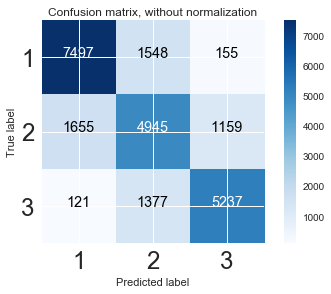

In [53]:
class_names = [1,2,3]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 24)
    plt.yticks(tick_marks, classes,fontsize = 24)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 size = 'x-large',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    precision = np.empty([cm.shape[0], cm.shape[1]])
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        precision[i,j] = cnf_matrix[i,j]/cm[:,i].sum()
    print("Precision Matrix")
    print(precision)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

8
8
('Diagnosis', 'Percent Male', 'State_full', 'Hospital Ownership', 'Percent Occupied Housing Units', 'Median Age', 'Uninsured: %', 'Median Income')


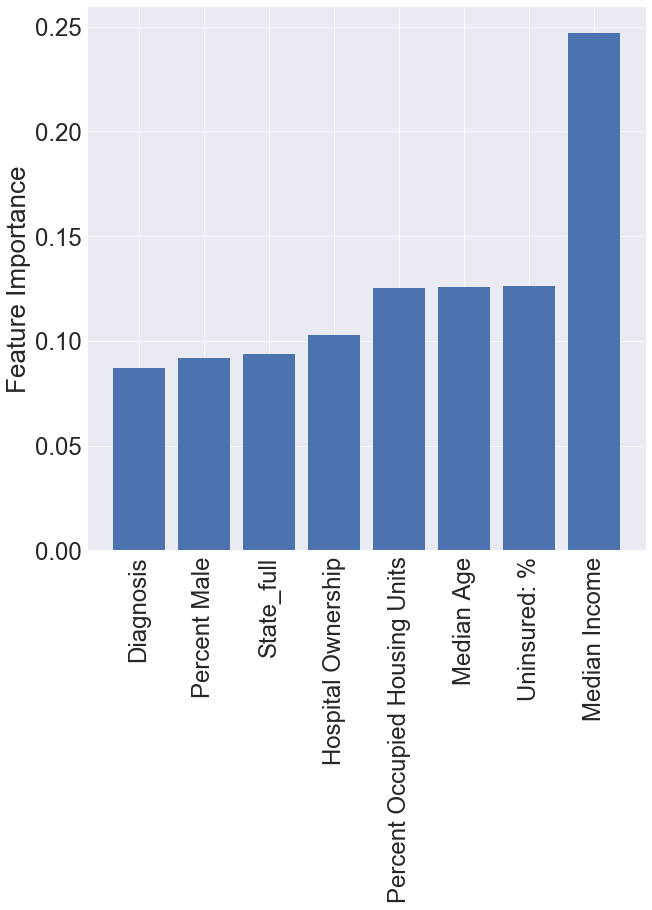

In [54]:
importances = random_search.best_estimator_.feature_importances_
feature_importance = importances

sns.set(context="paper", font='sans-serif')

feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

features = zip(*zipped)[0]
importance = zip(*zipped)[1]
x_pos = np.arange(len(zipped)) 

print(features)

plt.figure(figsize=(10,10))
plt.bar(x_pos, importance ,align='center')
plt.yticks(fontsize = 24) 
plt.xticks(x_pos, features, rotation = 90, fontsize = 24) 
plt.ylabel('Feature Importance', fontsize = 26)

plt.show()

## Logistic regression:


LogisticRegressionCV

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
#logregcv = LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 10000, 100000], cv=3, solver='sag'  , scoring=precision_score, random_state=1)
logregcv = LogisticRegressionCV(Cs=[0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 10000, 100000],\
                                cv=3, \
                                solver='sag', \
                                scoring='f1',\
                                random_state=1)


logregcv.fit(X_train,y_train)

/anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegressionCV(Cs=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 100, 1000, 10000, 100000],
           class_weight=None, cv=3, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=1, refit=True,
           scoring='f1', solver='sag', tol=0.0001, verbose=0)

In [56]:
print(logregcv.classes_)
print(logregcv.C_)


[ 0.  1.  2.]
[  1.00e+05   1.00e-06   1.00e-01]


In [57]:
acc_train_cv = logregcv.score(X_train, y_train)
acc_test_cv = logregcv.score(X_test, y_test)
print("train_score=%.3f\ntest_score =%.3f\n" % (acc_train_cv, acc_test_cv))

train_score=0.433
test_score =0.423



In [58]:
y_true = y_test
y_pred = logregcv.predict(X_test)

Confusion matrix, without normalization
[[6533 1571 1096]
 [4473 1969 1317]
 [3342 1863 1530]]
Precision Matrix
[[ 0.46  0.11  0.08]
 [ 0.83  0.36  0.24]
 [ 0.85  0.47  0.39]]


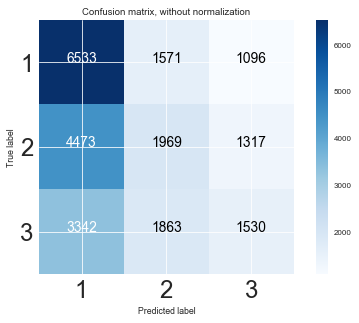

In [59]:
class_names = [1,2,3]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 24)
    plt.yticks(tick_marks, classes,fontsize = 24)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 size = 'x-large',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    precision = np.empty([cm.shape[0], cm.shape[1]])
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        precision[i,j] = cnf_matrix[i,j]/cm[:,i].sum()
    print("Precision Matrix")
    print(precision)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

In [60]:
y_true = y_test
y_pred = logregcv.predict(X_test)

In [61]:

# from sklearn import linear_model, datasets, cross_validation, metrics

# #print("Accuracy: %2f" % metrics.accuracy_score(y_true, y_pred))
# #print("Precision: %2f" % metrics.precision_score(y_true, y_pred, average="macro"))
# #print("F1: %2f" % metrics.f1_score(y_true, y_pred, average="macro"))
 
# for label in np.arange(3):
#     false_positive_rate, recall, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=label)
#     roc_auc = metrics.auc(false_positive_rate, recall)
#     plt.plot(false_positive_rate, recall, label='AUC(%d) = %0.2f' % (label, roc_auc))

# plt.title('Receiver Operating Characteristic')
# plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.ylabel('Recall')
# plt.xlabel('Fall-out')
# plt.show()


Gridsearch

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
logregGS= GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
GridSearchCV(cv=None,
       estimator=LogisticRegression(C=1.0, intercept_scaling=1, dual=False, fit_intercept=True,
          penalty='l2', tol=0.0001),
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

lr = logregGS.fit(X_train, y_train)
train_acc=lr.score(X_train, y_train)
test_acc=lr.score(X_test, y_test)

In [63]:
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

Training Data Accuracy: 0.44
Test Data Accuracy:     0.43


## SVC:

In [391]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1.0, 10., 100.],
              'degree':[2,3,4],
              'kernel':['rbf'],
              'gamma':[3,4]}

svm = GridSearchCV(SVC(), param_grid=param_grid)
svm.fit(X_train, y_train)

#plot_data(X_train, y_train, svm, 'SVC with Kernel: Non-Linearly Separable Data')

# The accuracy
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

NameError: name 'plot_data' is not defined

In [392]:
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.61340423736


In [395]:
svm_results = pd.DataFrame.from_dict(svm.cv_results_)
svm_results.sample(10)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_degree,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
14,337.082707,15.215601,0.540327,0.995686,100,3,3,rbf,"{u'kernel': u'rbf', u'C': 100.0, u'gamma': 3, ...",1,0.540941,0.995442,0.541375,0.996012,0.538666,0.995605,52.580335,0.122543,0.001188,0.00024
10,250.514297,15.754154,0.540327,0.995686,10,4,3,rbf,"{u'kernel': u'rbf', u'C': 10.0, u'gamma': 3, u...",1,0.540941,0.995442,0.541375,0.996012,0.538666,0.995605,0.513617,0.031668,0.001188,0.00024
1,182.596700,15.826725,0.363842,0.995686,1,2,4,rbf,"{u'kernel': u'rbf', u'C': 1.0, u'gamma': 4, u'...",16,0.363612,0.995442,0.364263,0.996012,0.363651,0.995605,0.226912,0.014528,0.000298,0.00024
7,255.587922,15.740578,0.363969,0.995686,10,2,4,rbf,"{u'kernel': u'rbf', u'C': 10.0, u'gamma': 4, u...",10,0.363666,0.995442,0.364426,0.996012,0.363814,0.995605,0.734185,0.044624,0.000329,0.00024
2,187.122463,15.791883,0.397974,0.995686,1,3,3,rbf,"{u'kernel': u'rbf', u'C': 1.0, u'gamma': 3, u'...",7,0.397797,0.995442,0.399913,0.996012,0.396212,0.995605,0.287565,0.010359,0.001516,0.00024
17,266.279067,15.868367,0.363969,0.995686,100,4,4,rbf,"{u'kernel': u'rbf', u'C': 100.0, u'gamma': 4, ...",10,0.363666,0.995442,0.364426,0.996012,0.363814,0.995605,14.628565,0.608439,0.000329,0.00024
13,297.431525,17.839929,0.363969,0.995686,100,2,4,rbf,"{u'kernel': u'rbf', u'C': 100.0, u'gamma': 4, ...",10,0.363666,0.995442,0.364426,0.996012,0.363814,0.995605,11.062168,0.753418,0.000329,0.00024
5,181.761693,15.846814,0.363842,0.995686,1,4,4,rbf,"{u'kernel': u'rbf', u'C': 1.0, u'gamma': 4, u'...",16,0.363612,0.995442,0.364263,0.996012,0.363651,0.995605,0.730632,0.082126,0.000298,0.00024
3,182.725271,15.750871,0.363842,0.995686,1,3,4,rbf,"{u'kernel': u'rbf', u'C': 1.0, u'gamma': 4, u'...",16,0.363612,0.995442,0.364263,0.996012,0.363651,0.995605,0.895626,0.084623,0.000298,0.00024
8,250.703139,15.766860,0.540327,0.995686,10,3,3,rbf,"{u'kernel': u'rbf', u'C': 10.0, u'gamma': 3, u...",1,0.540941,0.995442,0.541375,0.996012,0.538666,0.995605,0.072944,0.042529,0.001188,0.00024


In [396]:
svm.best_estimator_ 

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [397]:
svm.best_params_

{'C': 10.0, 'degree': 2, 'gamma': 3, 'kernel': 'rbf'}

In [405]:
y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.61340423736


Confusion matrix, without normalization
[[4971  273 2501]
 [1369 1368 4682]
 [  89  246 8195]]
Precision Matrix
[[ 0.77  0.04  0.39]
 [ 0.73  0.72  2.48]
 [ 0.01  0.02  0.53]]


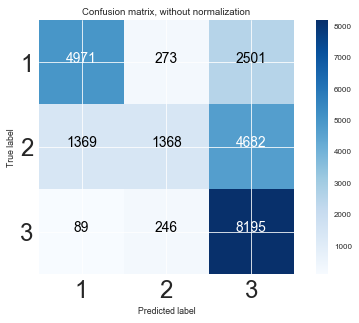

In [406]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

## Decision Trees:

In [64]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# specify parameters and distributions to sample from
param_dist = {"max_depth": [10,5,3,None],
              "max_features": sp_randint(1,6),
              "min_samples_split": sp_randint(2,20),
              "min_samples_leaf": sp_randint(2,20),
              "criterion": ["gini","entropy"],
              'splitter': ['best']}

# run randomized search
n_iter_search = 60
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)


random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          fit_params={}, iid=True, n_iter=60, n_jobs=1,
          param_distributions={'splitter': ['best'], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12d671150>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12d671590>, 'criterion': ['gini', 'entropy'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12d671f10>, 'max_depth': [10, 5, 3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [65]:
random_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 14,
 'splitter': 'best'}

In [66]:
random_search.best_estimator_ 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=14,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
acc_train_dt = random_search.score(X_train, y_train)
acc_test_dt = random_search.score(X_test, y_test)

print(acc_train_dt)
print(acc_test_dt)


0.782327937053
0.726597450831


0.726597450831
Confusion matrix, without normalization
[[7405 1646  149]
 [1834 4761 1164]
 [ 195 1490 5050]]
Precision Matrix
[[ 0.78  0.17  0.02]
 [ 0.23  0.6   0.15]
 [ 0.03  0.23  0.79]]


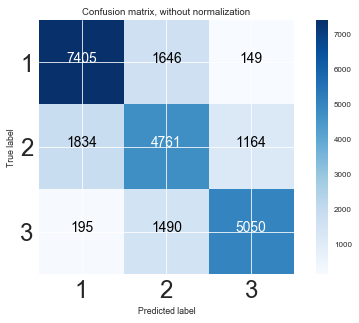

In [68]:
y_pred = random_search.predict(X_test)
print(accuracy_score(y_test, y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

plt.show()

8
8
('Diagnosis', 'State_full', 'Uninsured: %', 'Percent Male', 'Hospital Ownership', 'Median Age', 'Percent Occupied Housing Units', 'Median Income')


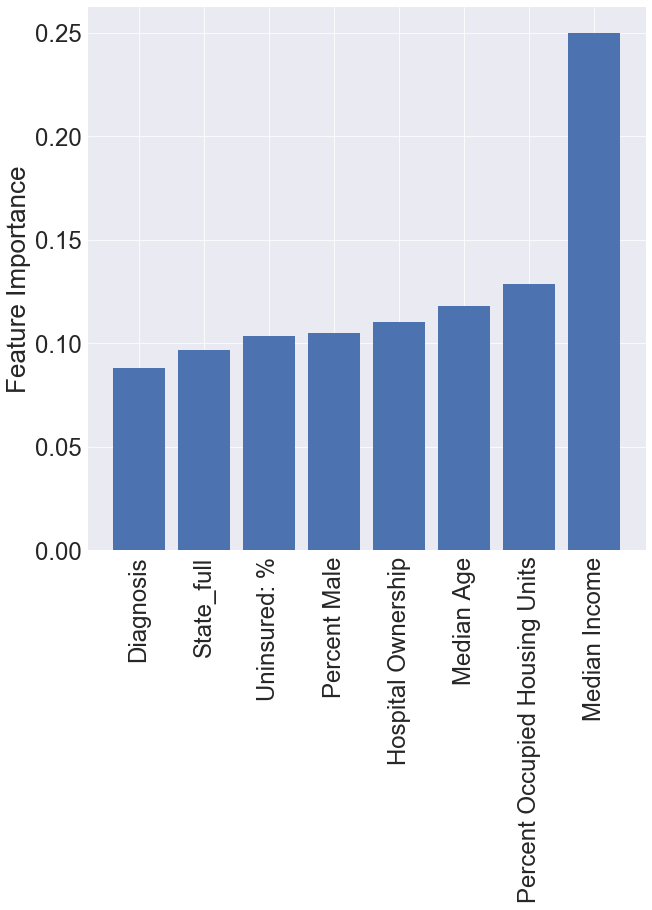

In [69]:
importances = random_search.best_estimator_.feature_importances_
feature_importance = importances

sns.set(context="paper", font='sans-serif')

feature_importance = importances
feature_importance_list = list()
features_list = list()
for feature in feature_importance:
    feature_importance_list.append(feature)
for column in X_coded.columns:
    features_list.append(column)

print(len(feature_importance_list))
print(len(features_list))

zipped = zip(features_list,feature_importance_list)
zipped.sort(key = lambda t: t[1])
zipped

features = zip(*zipped)[0]
importance = zip(*zipped)[1]
x_pos = np.arange(len(zipped)) 

print(features)

plt.figure(figsize=(10,10))
plt.bar(x_pos, importance ,align='center')
plt.yticks(fontsize = 24) 
plt.xticks(x_pos, features, rotation = 90, fontsize = 24) 
plt.ylabel('Feature Importance', fontsize = 26)

plt.show()